# تحلیل تکمیلی مدل‌های یادگیری ماشین برای تشخیص سرطان سینه

در این پروژه مدل‌های مختلف یادگیری ماشین را روی دیتاست سرطان سینه بررسی و مقایسه می‌کنیم. مراحل زیر را انجام خواهیم داد:
1. اعتبارسنجی متقاطع (K-fold)
2. نمودارهای مقایسه‌ای مدل‌ها
3. تحلیل ماتریس اغتشاش
4. بررسی اهمیت ویژگی‌ها
5. مقایسه منحنی ROC


In [2]:
# وارد کردن کتابخانه‌های مورد نیاز
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# مدل‌های یادگیری ماشین
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


In [3]:
# بارگذاری دیتاست سرطان سینه
data = load_breast_cancer()

# ویژگی‌ها و برچسب‌ها
X = data.data
y = data.target

# نرمال‌سازی داده‌ها (مقیاس‌بندی بین 0 تا 1)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# تقسیم‌بندی داده‌ها به داده‌های آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("شکل ویژگی‌ها:", X.shape)
print("برچسب‌ها:", np.unique(y))


شکل ویژگی‌ها: (569, 30)
برچسب‌ها: [0 1]


In [5]:

from sklearn.ensemble import GradientBoostingClassifier


models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier()
}


results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    results[name] = cv_scores
    print(f"{name} دقت: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")


Logistic Regression دقت: 0.9582 (+/- 0.0162)
K-Nearest Neighbors دقت: 0.9582 (+/- 0.0213)
Support Vector Machine دقت: 0.9824 (+/- 0.0088)
Decision Tree دقت: 0.9099 (+/- 0.0213)
Random Forest دقت: 0.9516 (+/- 0.0132)
Naive Bayes دقت: 0.9341 (+/- 0.0209)
Gradient Boosting دقت: 0.9538 (+/- 0.0128)


In [8]:

best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)


y_pred = best_model.predict(X_test)


دقت نهایی روی داده تست: 0.9561

گزارش طبقه‌بندی:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


ماتریس Confusion:
[[40  3]
 [ 2 69]]


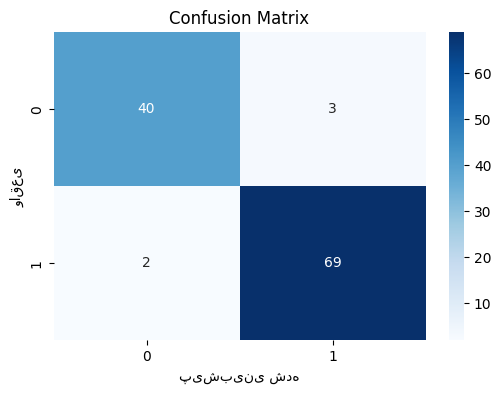

In [10]:

from sklearn.metrics import classification_report


accuracy = accuracy_score(y_test, y_pred)
print(f"دقت نهایی روی داده تست: {accuracy:.4f}")


print("\nگزارش طبقه‌بندی:")
print(classification_report(y_test, y_pred))

    
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nماتریس Confusion:")
print(conf_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('پیش‌بینی شده')
plt.ylabel('واقعی')
plt.title('Confusion Matrix')
plt.show()
